You dolt, you cannot use that bed file you just made it is the wrong type of bed file, You need to have an actual bed file. The GTF_Transcript asembler function from the gff.py file should work. 

## I very much need to change the path to all of these files I am going to be opening. 

In [75]:
from plastid import GTF2_TranscriptAssembler

In [76]:
# import plastid
# data structure for mapping read alignments to genomic positions
from plastid import BAMGenomeArray, FivePrimeMapFactory, \
                        BED_Reader, Transcript
import numpy as np

# load the transcript annotations from the BED file.
# BED_Reader returns an iterator, so here we convert it to a list.
transcripts = list(GTF2_TranscriptAssembler(open("Drosophila_melanogaster.BDGP6.32.103.gtf"),return_type=Transcript))

In [78]:
from plastid import *
maprule = VariableFivePrimeMapFactory.from_file(open("dmel_Fmr1_2_riboprofile_p_offsets.txt"))

# load ribosome profiling data
alignments = BAMGenomeArray("dmel_Fmr1_RPF_2_Aligned.sortedByCoord.out.bam")

# set P-site mapping as 14 nucleotides from 5' end
alignments.set_mapping(maprule)

In [79]:
# create a list to hold the vectors
count_vectors = []

# get counts for each transcript
for transcript in transcripts:
    count_vectors.append(transcript.get_counts(alignments))

In [139]:
# Create a function that finds the proteins I need. 
def find_transcript(prot,transcripts = transcripts, count_vectors = count_vectors):
    '''
    A function that finds the transcripts from the protein name. 
    '''
    for i in transcripts:
        if i.attr['transcript_biotype'] == 'protein_coding':
            if i.attr['gene_name'] == prot:
                my_transcript = i
                my_vector = count_vectors[transcripts.index(i)]
                
    return my_transcript, my_vector

In [147]:
#Get the transcript and vector for the gene of interest
my_transcript, my_vector = find_transcript('lost')

In [148]:
# lengths should match
my_transcript.length, len(my_vector)

(2691, 2691)

In [149]:
# get total counts over entire array
my_vector.sum()

3279.0

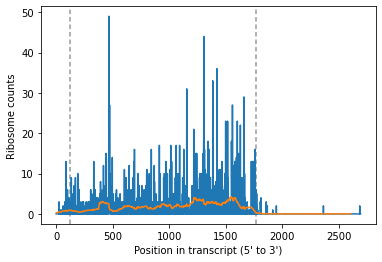

In [150]:
import numpy

# mean & variance in coverage
my_vector.mean(), my_vector.var()

# location of highest peak
my_vector.argmax()
237

# take cumulative sum
my_vector.cumsum()

# 30-codon sliding window average
window = numpy.ones(90).astype(float)/90.0
sliding_window_avg = numpy.convolve(my_vector,window,mode="valid")


# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(my_vector,label="%s counts" % my_transcript.get_name())
plt.plot(sliding_window_avg,label="30 codon average")
plt.xlabel("Position in transcript (5' to 3')")
plt.ylabel("Ribosome counts")

# add outlines at start & stop codons
plt.axvline(my_transcript.cds_start,color="#999999",dashes=[3,2],zorder=-1)
plt.axvline(my_transcript.cds_end,color="#999999",dashes=[3,2],zorder=-1)

Ok, there is clearly way too much data in this GTF file and I need to find the specific set of the GTF file that is useful to me, at the moment it just gives me everything in a fly that ever was. 

Hmmmm, I definitely need to pick genes that have a decent number of reads in order to see anything. 